In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('fivethirtyeight')

In [74]:
df = pd.read_csv('data/US_CPI.csv')

In [75]:
df.isnull().sum()

Yearmon    0
CPI        0
dtype: int64

In [76]:
df['Yearmon'] = pd.to_datetime(df['Yearmon'])

In [77]:
df.head(5)

,Yearmon,CPI
0,1913-01-01,9.8
1,1913-01-02,9.8
2,1913-01-03,9.8
3,1913-01-04,9.8
4,1913-01-05,9.7


In [78]:
time = df['Yearmon'].iloc[0]
df['Year'] = df['Yearmon'].apply(lambda time:time.year)
df['Month'] = df['Yearmon'].apply(lambda time: time.day)

In [79]:
df['CPI'].value_counts()\
        .head(20)\
        .to_frame(name = 'Count')\
        .reset_index()\
        .style.background_gradient(cmap = 'Set3', subset='Count')

,index,Count
0,14.000000,24
1,17.300000,23
2,14.100000,16
3,17.700000,16
4,17.100000,15
5,17.400000,15
6,26.900000,15
7,26.700000,14
8,16.900000,13
9,17.200000,13


<AxesSubplot:xlabel='Month', ylabel='count'>

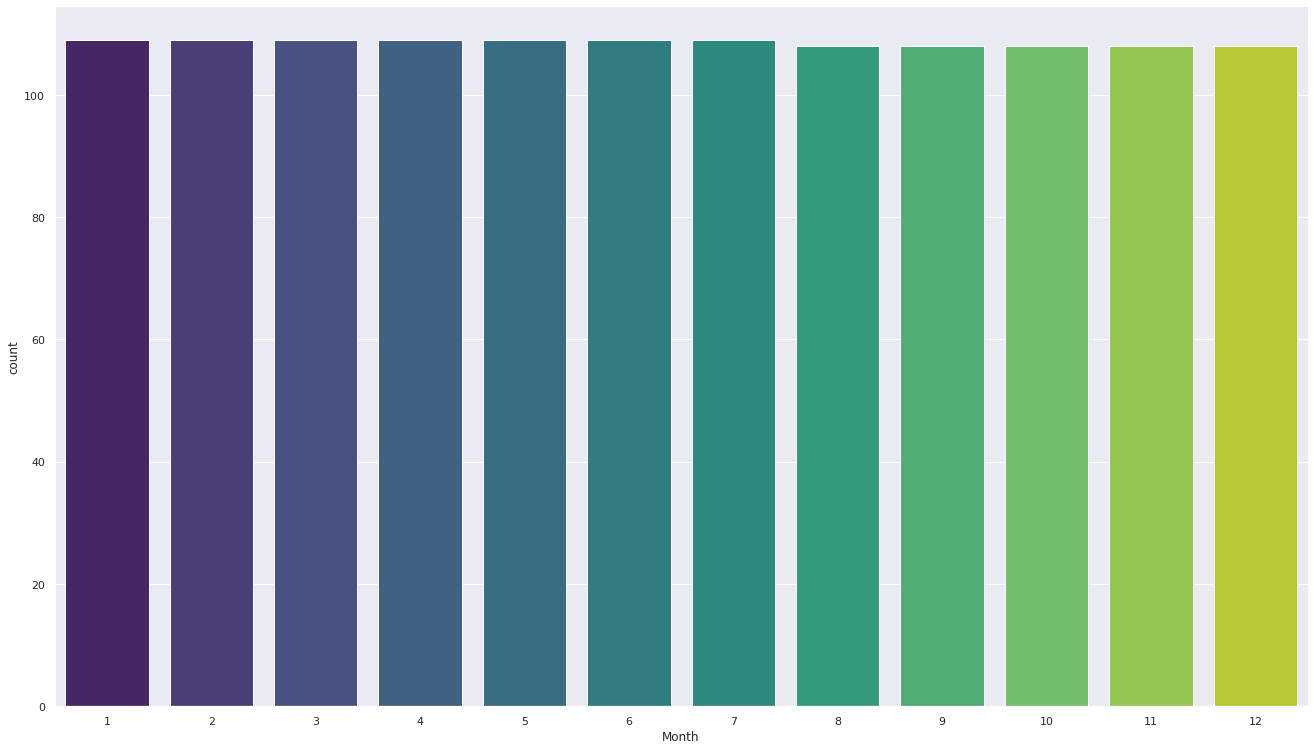

In [80]:
sns.set(rc={'figure.figsize':(20,12)})
sns.countplot(x ='Month', data =df, palette='viridis')

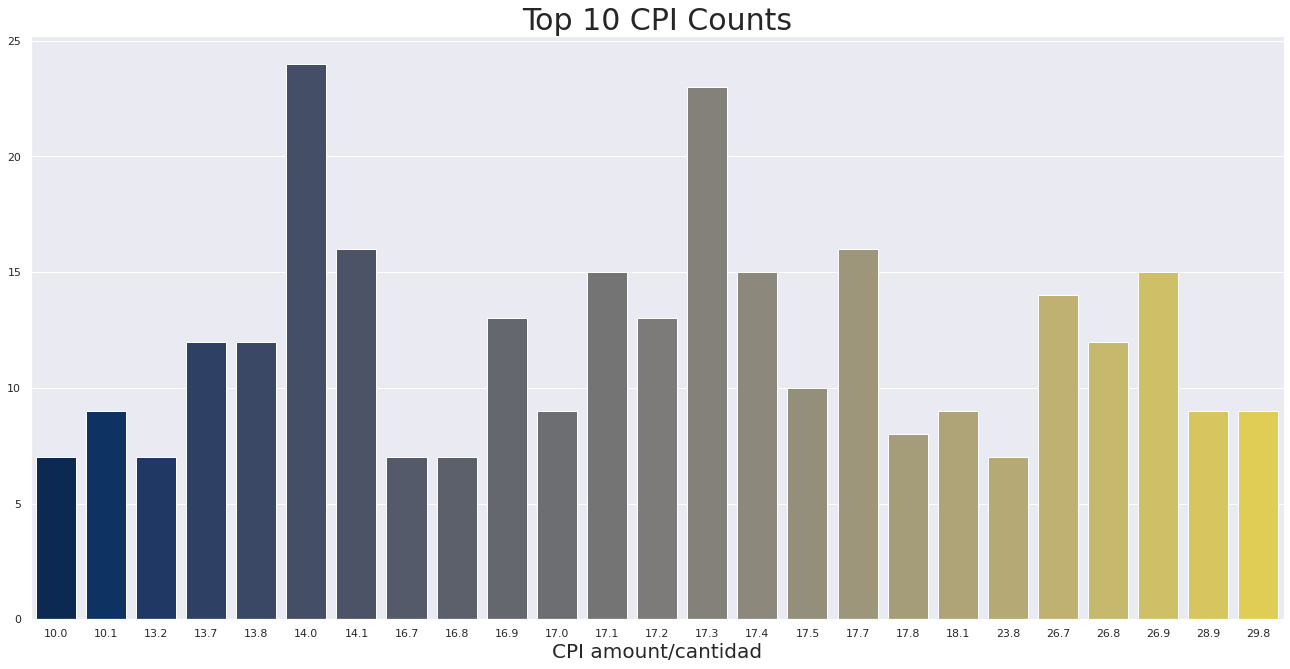

In [81]:
cpi_count = df['CPI'].value_counts()
cpi_count = cpi_count[:10]

plt.figure(figsize = (20,10))
sns.barplot(x = cpi_count.index , y = cpi_count.values, palette='cividis')
plt.title('Top 10 CPI Counts', fontsize = 30)
plt.xlabel('CPI amount/cantidad', fontsize = 20)
plt.show()

In [82]:
df = df.set_index(df['Yearmon'])

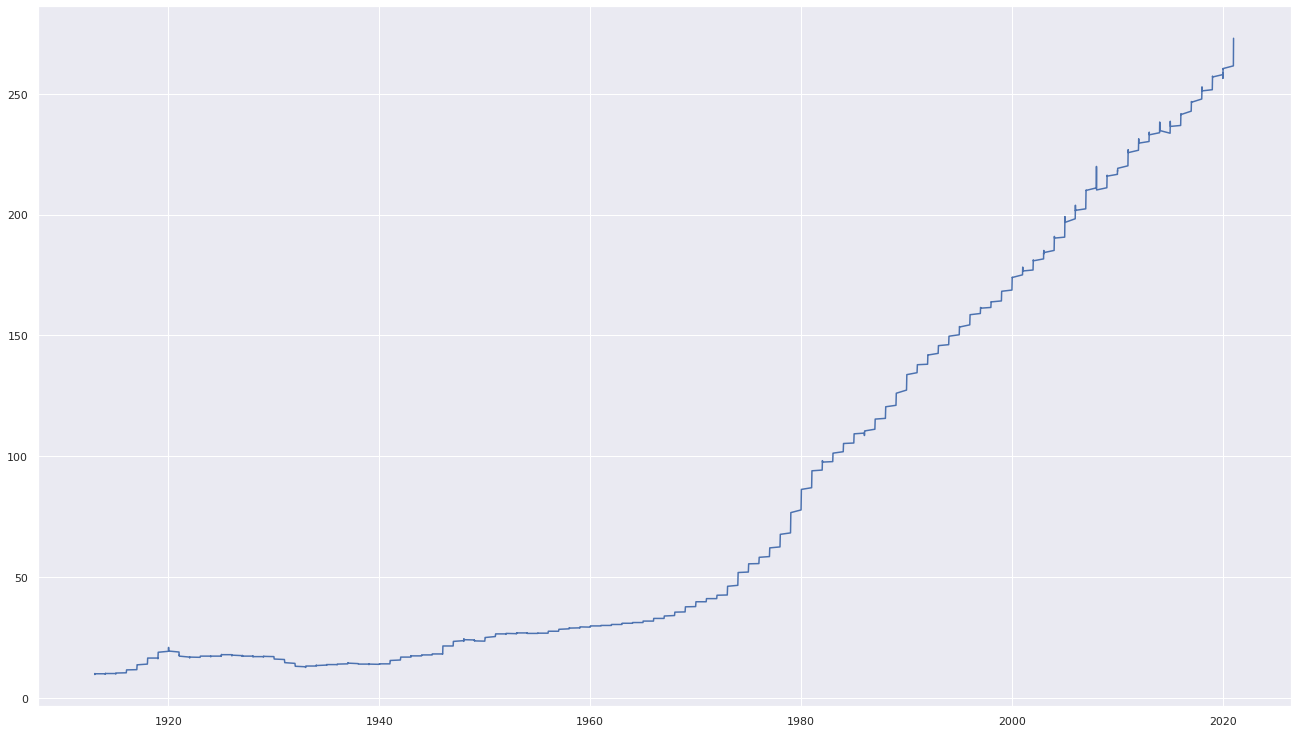

In [83]:
plt.figure(figsize = (20,12))
plt.plot(df['CPI'])

In [84]:
import plotly.express as px
fig = px.scatter(df, x ='Year', y='CPI', title='Year and CPI', size = 'CPI', color = 'CPI', size_max = 60)
fig.show()

In [63]:
df['pctchange'] = df['CPI'].pct_change()

In [64]:
df.dropna()

,Yearmon,CPI,Year,Month,pctchange
Yearmon,,,,,
1913-01-02,1913-01-02,9.800,1913,2,0.000000
1913-01-03,1913-01-03,9.800,1913,3,0.000000
1913-01-04,1913-01-04,9.800,1913,4,0.000000
1913-01-05,1913-01-05,9.700,1913,5,-0.010204
1913-01-06,1913-01-06,9.800,1913,6,0.010309
...,...,...,...,...,...
2021-01-03,2021-01-03,264.877,2021,3,0.007083
2021-01-04,2021-01-04,267.054,2021,4,0.008219
2021-01-05,2021-01-05,269.195,2021,5,0.008017


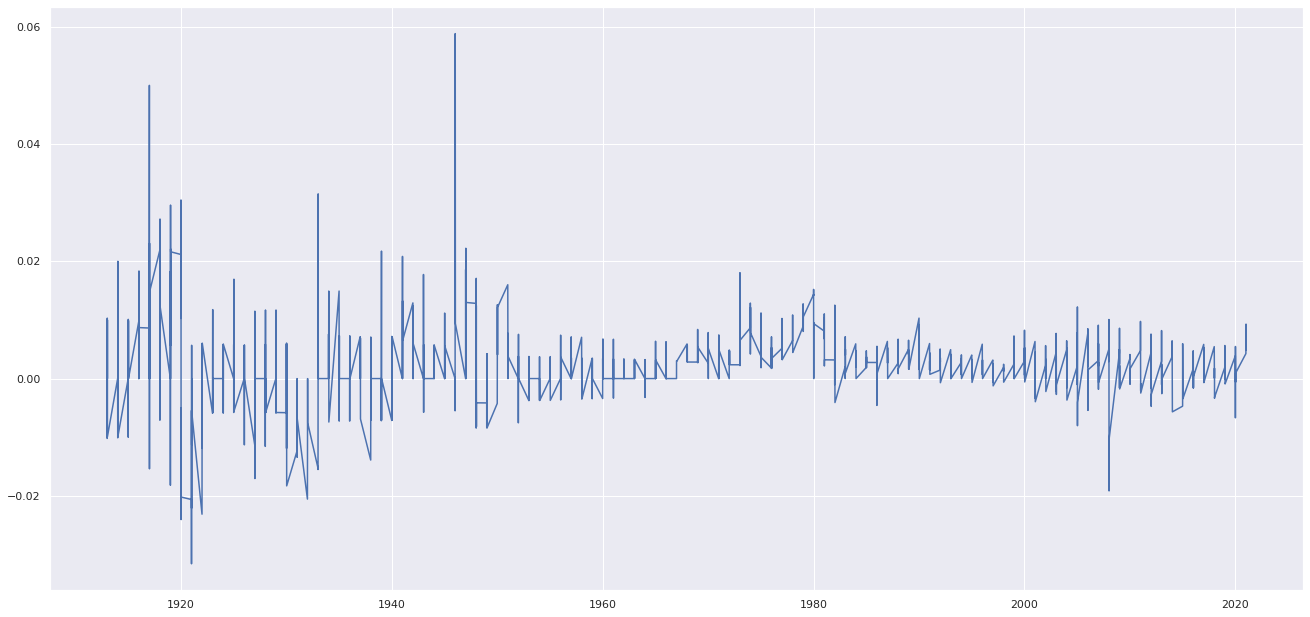

In [65]:
plt.figure(figsize=(20,10))
plt.plot(df['pctchange'])

array([<AxesSubplot:xlabel='Yearmon'>, <AxesSubplot:xlabel='Yearmon'>,
       <AxesSubplot:xlabel='Yearmon'>, <AxesSubplot:xlabel='Yearmon'>,
       <AxesSubplot:xlabel='Yearmon'>], dtype=object)

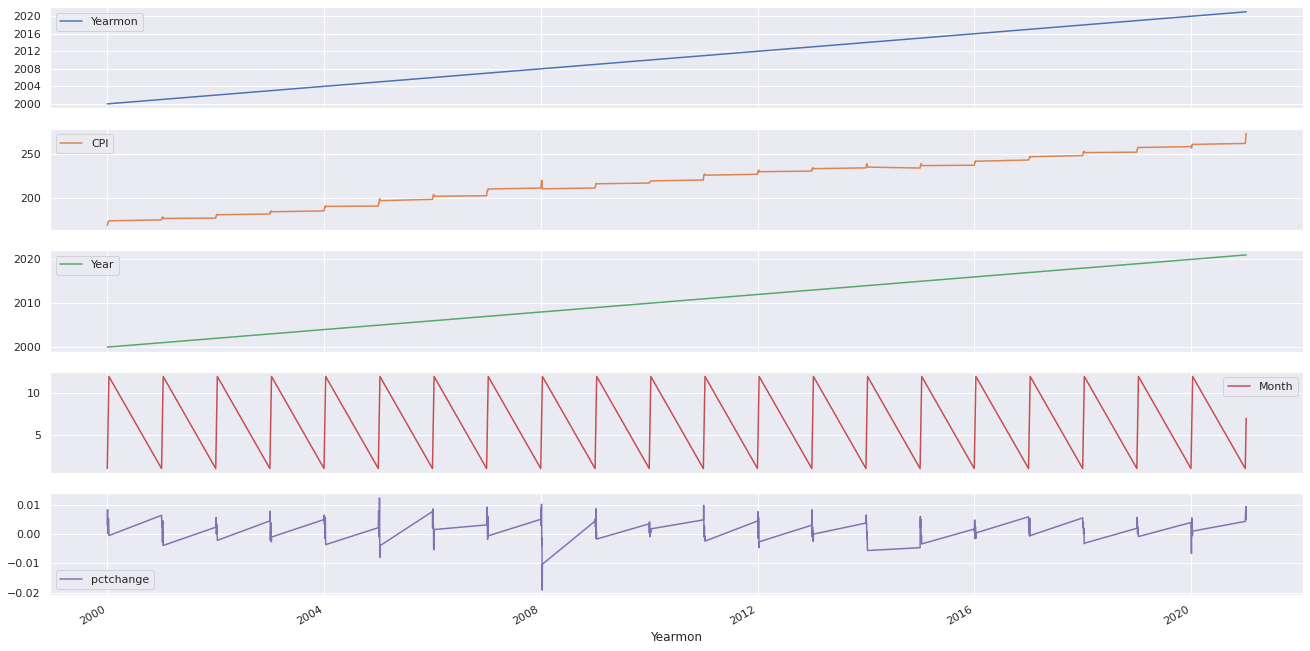

In [66]:
df['2000':'2022'].plot(subplots = True)

<AxesSubplot:xlabel='Yearmon'>

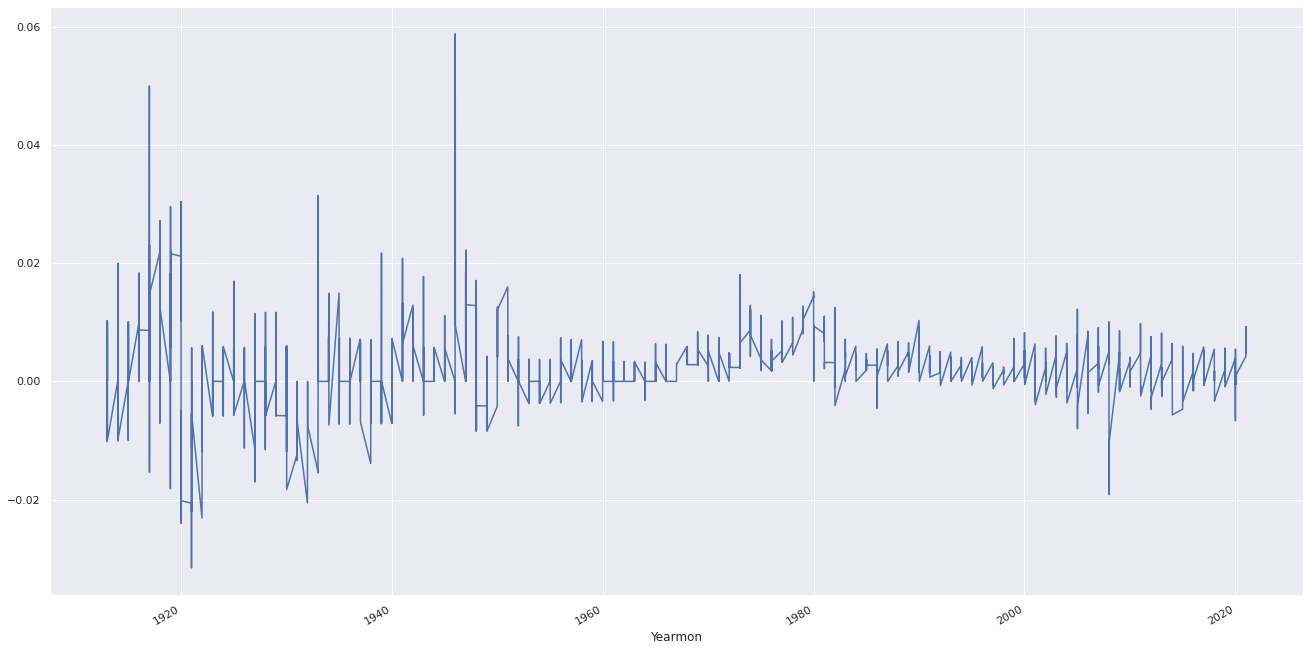

In [67]:
df.pctchange.plot()

<AxesSubplot:xlabel='CPI', ylabel='pctchange'>

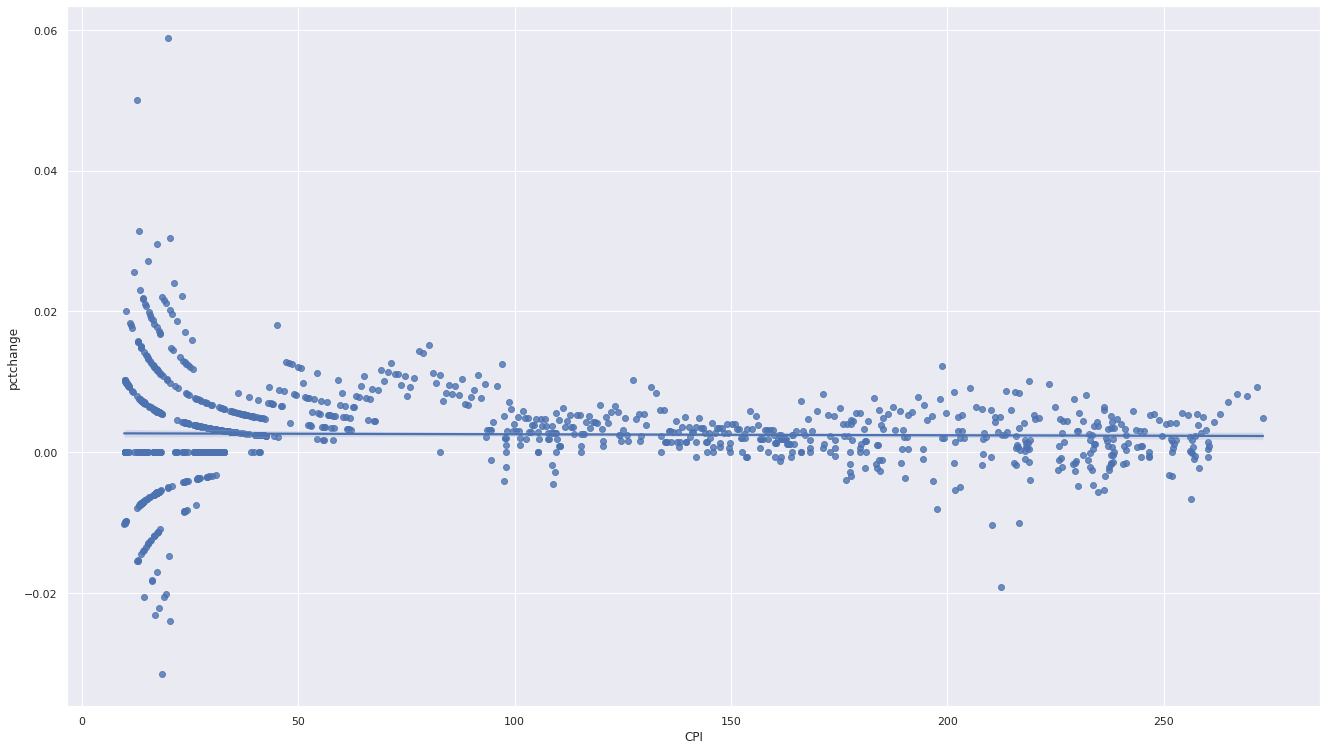

In [68]:
sns.regplot(x = 'CPI', y = 'pctchange', data = df)

In [69]:
df.corr()

,CPI,Year,Month,pctchange
CPI,1.000000,0.913300,-0.000324,-0.017639
Year,0.913300,1.000000,-0.006731,0.024924
Month,-0.000324,-0.006731,1.000000,-0.039618
pctchange,-0.017639,0.024924,-0.039618,1.000000


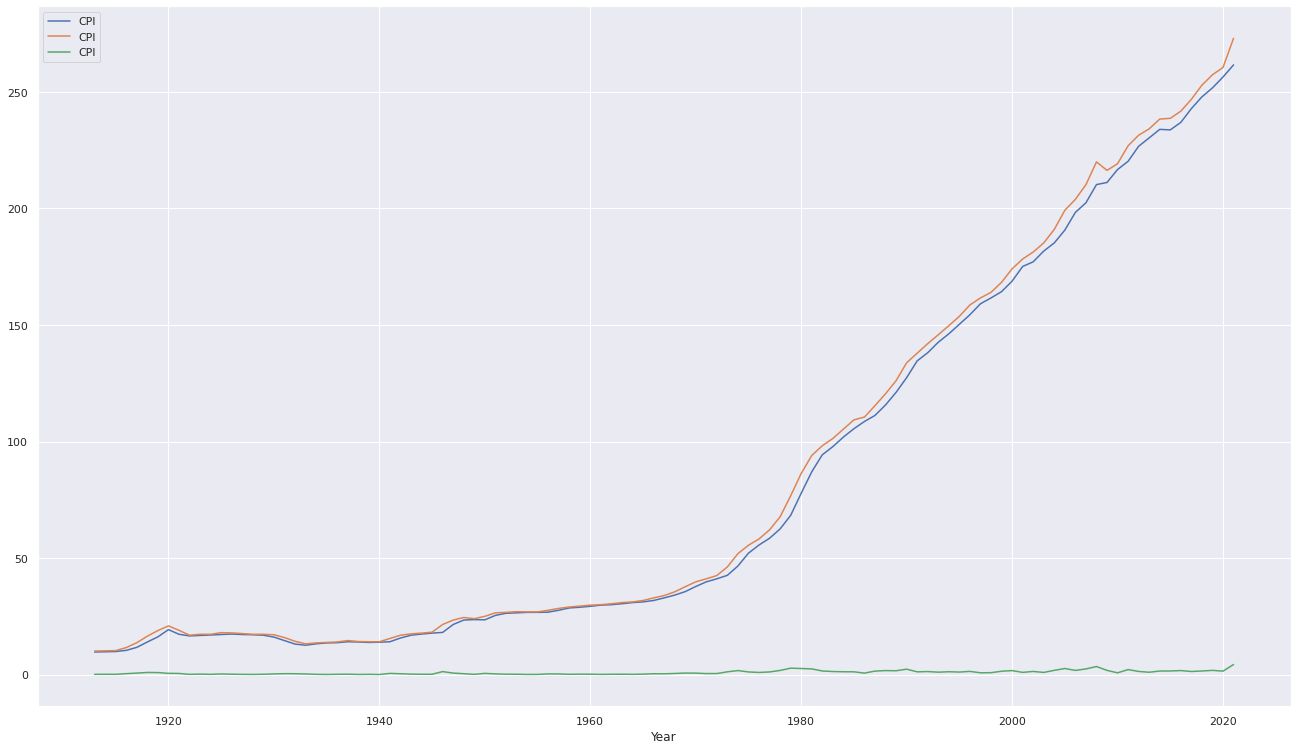

In [70]:
year_cpi_min = df.groupby('Year')['CPI'].min().plot(kind = 'line', legend = 'MIN')
year_cpi_max = df.groupby('Year')['CPI'].max().plot(kind = 'line', legend = 'MAX')
year_cpi_avg = df.groupby('Year')['CPI'].std().plot(kind = 'line', legend = 'STD')

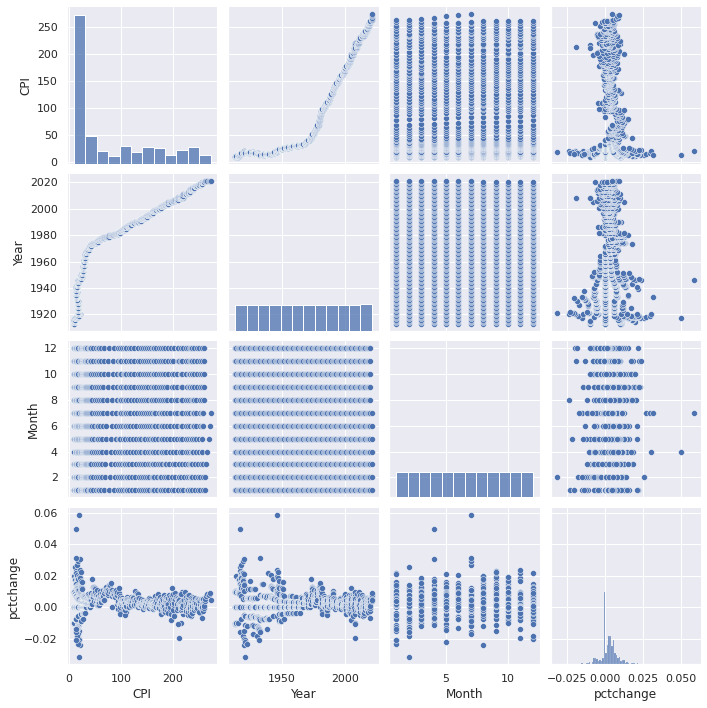

In [71]:
sns.pairplot(df)